# Perch 무게 예측

*   농어의 모든 특성들을 사용한 무게 예측
*   KNN Regressor  vs linear Regression 비교
*   다항 회귀
*   규제(regulation)

# import

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error

# 데이터 준비

In [76]:
file_path = 'https://github.com/JakeOh/202505_BD50/raw/refs/heads/main/datasets/fish.csv'

In [77]:
fish = pd.read_csv(file_path)

In [78]:
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [79]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


In [80]:
perch = fish[fish.Species == 'Perch']

In [81]:
perch.head()

,Species,Weight,Length,Diagonal,Height,Width
72,Perch,5.9,8.4,8.8,2.1120,1.4080
73,Perch,32.0,13.7,14.7,3.5280,1.9992
74,Perch,40.0,15.0,16.0,3.8240,2.4320
75,Perch,51.5,16.2,17.2,4.5924,2.6316
76,Perch,70.0,17.4,18.5,4.5880,2.9415


Weight ~ Length + Diagonal + Height + Width

In [82]:
# X = perch[['Length','Diagonal','Height','Width']].values
perch.columns[2:]           #> perch의 Species를 제외한 컬럼들
X = perch[perch.columns[2:]].values         # 특성 배열(features)

In [83]:
X[:5,:]

array([[ 8.4   ,  8.8   ,  2.112 ,  1.408 ],
       [13.7   , 14.7   ,  3.528 ,  1.9992],
       [15.    , 16.    ,  3.824 ,  2.432 ],
       [16.2   , 17.2   ,  4.5924,  2.6316],
       [17.4   , 18.5   ,  4.588 ,  2.9415]])

In [84]:
y = perch.Weight.values

In [85]:
y[:5]           # 타겟 배열(target)

array([ 5.9, 32. , 40. , 51.5, 70. ])

# 훈련셋/ 테스트셋 나누기

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state= 42)

In [87]:
X_train.shape

(42, 4)

In [88]:
X_test.shape

(14, 4)

In [89]:
y_train.shape

(42,)

In [90]:
y_test.shape

(14,)

# 1차항만 고려한 회귀

## KNN

In [91]:
knn = KNeighborsRegressor()

In [92]:
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [93]:
train_pred = knn.predict(X_train)

In [94]:
train_pred[:5]

array([ 87.6, 123. ,  79.6,  70.6, 723. ])

In [95]:
y_train

array([  85.,  135.,   78.,   70.,  700.,  180.,  850.,  820., 1000.,
        120.,   85.,  130.,  225.,  260., 1100.,  900.,  145.,  115.,
        265., 1015.,  514.,  218.,  685.,   32.,  145.,   40.,  690.,
        840.,  300.,  170.,  650.,  110.,  150.,  110., 1000.,  150.,
         80.,  700.,  120.,  197., 1100.,  556.])

In [96]:
test_pred = knn.predict(X_test)

In [97]:
test_pred[:5]

array([ 60. ,  79.6, 248. , 122. , 130. ])

In [98]:
y_test[:5]

array([  5.9, 100. , 250. , 130. , 130. ])

In [99]:
print('훈련 셋 MSE: ', mean_squared_error(y_train, train_pred))
print('훈련 셋 R2: ', r2_score(y_train, train_pred))
print('테스트 셋 MSE: ', mean_squared_error(y_test, test_pred))
print('테스트 셋 r2: ', r2_score(y_test, test_pred))

훈련 셋 MSE:  2986.5723809523806
훈련 셋 R2:  0.97579760182756
테스트 셋 MSE:  837.3100000000001
테스트 셋 r2:  0.9916579819676246


KNN 모델은 과소적합.

## Linear Regression

$$
\hat{y} = w_0 + w_1 \times x_1 + w_2 \times x_2 + w_3 \times x_3 + w_4 \times x_4
$$

선형회귀식에서 예측한 값 $\hat{y}$들의 MSE가 최소가 되는 $w_0$ ~ $w_4$를 찾는 과정.

In [100]:
lin_reg = LinearRegression()            # ML 모델 생성

In [101]:
lin_reg.fit(X_train, y_train)           # ML 모델 훈련

LinearRegression()

In [102]:
lin_reg.coef_

array([-40.18338554,  47.80681727,  67.34086612,  35.34904264])

In [103]:
lin_reg.intercept_

np.float64(-610.0275364260515)

무게 = -610 -40 x length + 47 x Diagnoal + 57 x Height + 35 x width

In [104]:
train_pred = lin_reg.predict(X_train) # 훈련 셋 예측값 계산

In [105]:
test_pred = lin_reg.predict(X_test)   # 테스트 셋 예측값 계산

In [106]:
print('훈련셋 R2: ', r2_score(y_train, train_pred))
print('테스트셋 R2: ', r2_score(y_test, test_pred))

훈련셋 R2:  0.9567246116638569
테스트셋 R2:  0.8790465615990273


Linear Regression은 과대적합.

Linear Regression은 KNN보다 오차가 큼.

# 2차항을 고려한 회귀

## KNN

In [107]:
poly = PolynomialFeatures(include_bias= False)
# dgree = 2(기본값): 2차항 까지 고려
# interaction_only = False(기본값): x1^2,...,x4^2, x1*x2, x1*x3,... 2차항들을 모두 고려. True로한다면 각각의 제곱들이 없어짐.

In [108]:
scaler = StandardScaler()

In [109]:
knn = KNeighborsRegressor()

In [110]:
pipe = Pipeline(steps = [('poly', poly),
                         ('scaler', scaler),
                         ('knn', knn)])

In [111]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()), ('knn', KNeighborsRegressor())])

In [112]:
pipe['poly'].get_feature_names_out()

array(['x0', 'x1', 'x2', 'x3', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x1^2',
       'x1 x2', 'x1 x3', 'x2^2', 'x2 x3', 'x3^2'], dtype=object)

In [113]:
train_pred = pipe.predict(X_train)

In [114]:
train_pred[:5]

array([ 79.6, 130. ,  79.6,  79.6, 666.2])

In [115]:
y_train[:5]

array([ 85., 135.,  78.,  70., 700.])

In [116]:
test_pred = pipe.predict(X_test)

In [117]:
test_pred[:5]

array([ 61. ,  79.6, 248. , 122. , 130. ])

In [118]:
y_test[:5]

array([  5.9, 100. , 250. , 130. , 130. ])

In [119]:
print('훈련셋 R2: ', r2_score(y_train, train_pred))
print('테스트셋 R2: ', r2_score(y_test, test_pred))

훈련셋 R2:  0.9852536214139073
테스트셋 R2:  0.9861441832656344


1차항만 고려한 KNN과 비교하면 훈련 셋의 점수가 좋아졌고, 과소적합의 크기도 줄어듦.

## Linear Regression

In [120]:
poly = PolynomialFeatures(include_bias = False)
scaler = StandardScaler()
lin_reg = LinearRegression()
pipe = Pipeline(steps = [('poly', poly),
                        ('scaler', scaler),
                        ('lin_reg', lin_reg)])

In [121]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()), ('lin_reg', LinearRegression())])

In [122]:
# 선형회귀의 계수들(coefficients)
pipe['lin_reg'].coef_

array([   -443.26816038,    1150.91134799,    -650.22360319,
          -368.62831244,  115424.97558529, -210083.78541693,
        -49872.08633923,   29100.85132271,   91656.18352519,
         53699.90248991,  -27521.03052328,    1226.11352267,
         -5243.73927458,    2288.55011685])

In [123]:
# 선형회귀의 절편(intercept)
pipe['lin_reg'].intercept_

np.float64(400.833333333325)

In [124]:
pipe['poly'].get_feature_names_out()

array(['x0', 'x1', 'x2', 'x3', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x1^2',
       'x1 x2', 'x1 x3', 'x2^2', 'x2 x3', 'x3^2'], dtype=object)

In [125]:
train_pred = pipe.predict(X_train)          # 훈련 셋 예측값

In [126]:
train_pred[:5]

array([ 86.22462498, 117.8371985 ,  65.36623277,  51.32036181,
       688.61814191])

In [127]:
y_train[:5]

array([ 85., 135.,  78.,  70., 700.])

In [128]:
test_pred = pipe.predict(X_test)            # 테스트 셋 예측값

In [129]:
print('훈련 셋 R2:', r2_score(y_train, train_pred))
print('테스트 셋 R2:', r2_score(y_test, test_pred))

훈련 셋 R2: 0.9920055538341164
테스트 셋 R2: 0.949260960155254


# 규제의 필요성

*   선형 회귀: Weight ~ Length
*   고차항을 포함하는 선형 회귀:
    *   1차항: W ~ L
    *   2차항: W ~ L + L^2
    *   5차항: W ~ L + L^2 + L^3 + L^4 + L^5
    *   50차항: W ~ L + L^2 + L^3 + L^4 + L^5 +...+ L^50

In [130]:
X = perch[['Length']].values  # 특성 배열
y = perch['Weight'].values  # 타겟 배열

In [131]:
# 훈련/테스트 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [132]:
pipe = Pipeline(steps=[('poly', PolynomialFeatures(degree=1, include_bias=False)),
                       ('scaler', StandardScaler()),
                       ('reg', LinearRegression())])

In [133]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=1, include_bias=False)),
                ('scaler', StandardScaler()), ('reg', LinearRegression())])

In [134]:
pipe['reg'].coef_

array([340.55381311])

In [135]:
pipe['reg'].intercept_

np.float64(400.83333333333337)

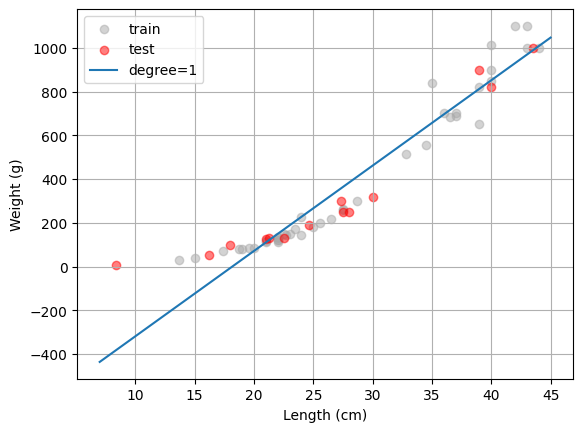

In [136]:
# 훈련 셋 산점도(무게 ~ 길이)
plt.scatter(X_train, y_train, color='DarkGray', alpha=0.5, label='train')

# 테스트 셋 산점도
plt.scatter(X_test, y_test, color='Red', alpha=0.5, label='test')

# 선형 회귀 직선 선그래프
x_vals = np.arange(7, 45, 0.001).reshape((-1, 1))
y_vals = pipe.predict(x_vals)  # y = w0 + w1 x x
plt.plot(x_vals, y_vals, label='degree=1')

plt.legend()
plt.grid()
plt.xlabel('Length (cm)')
plt.ylabel('Weight (g)')
plt.show()


*   머신 러닝의 목적은 비용 함수(cost function)/손실 함수(loss function)을 최소화하는 것.


*   선형 회귀(linear regression)의 목적은 MSE(mean_squared_error)를 최소로 만드는 계수들($w_0, ..., w_m$)을 찾는 것. 즉, 선형 회귀의 비용 함수는 MSE(w).
$$
J(w) = MSE(w)
     = \dfrac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y_i})^2
     = \dfrac{1}{N} \sum_{i=1}^{N} (y_i - (w_0 + \sum_{j=1}^{m} w_{j} \cdot x_{ij}))^2
$$
    *   $N$: 샘플의 개수(DataFrame의 row의 개수)
    *   $m$: 특성의 개수(DataFrame의 column의 개수)
    *   $y_i$: $i$번째 샘플의 실젯값
    *   $\hat{y_i}$: $i$번째 샘플의 예측값
    *   $x_{ij}$: $i$번째 샘플의 $j$번째 특성 값
    *   $w_j$: $j$번째 특성에 곱해주는 계수(기울기)

*   Ridge(`l2`) 규제의 목적은 아래의 비용 함수를 최소로 만드는 계수들($w_0, ..., w_m$)을 찾는 것.

$$
J(w) = MSE(w) + \dfrac{\alpha}{2} \mid\mid w \mid\mid ^2
$$

> Ridge 규제의 효과는 고차항들의 계수(coefficients, 기울기)를 작게 만들어서 곡선의 기울기를 완만하게 만들어 주게 됨. overfitting(과대적합)을 줄여주게 됨.

*   Lasso(`l1`) 규제의 목적은 아래의 비용 함수를 최소로 만드는 계수들($w_0, ..., w_m$)을 찾는 것.

$$
J(w) = MSE(w) + \alpha \mid\mid w \mid\mid
$$

> Lasso 규제는 중요하지 않은 고차항들의 계수를 0으로 만들어 줌으로써, 곡선을 완만하게 만들어 주는 효과가 생김. 과대적합을 줄여주는 효과.

*   ElasticNet 규제의 목적은 아래의 비용 함수를 최소로 만드는 계수들($w_0, ..., w_m$)을 찾는 것.

$$
J(w) = MSE(w) + r \alpha \mid\mid w \mid\mid
              + \dfrac{1 - r}{2} \alpha \mid\mid w \mid\mid ^2
$$

> ElasticNet은 Ridge 규제와 Lasso 규제의 효과를 모두 가지고 있음.

*   Ridge, Lasso에서 $\alpha$ 값이 크면 규제가 강해지고, $\alpha$ 값이 작으면 규제가 약해짐($ \alpha \ge 0 $).
*   ElasticNet에서 $\alpha$는 규제의 크기를 의미하고, $r$은 `l1` 규제의 비율($0 \le r \le 1$)을 의미함.

## l2 규제 (Ridge)

In [137]:
def visualize_regression(X_train, y_train, X_test, y_test, degrees, estimator):
    plt.figure(figsize= (10,10))

    plt.scatter(X_train, y_train, color='black', alpha = 0.5, label= 'train')
    plt.scatter(X_test, y_test, color = 'orange',alpha = 0.5, label= 'test')
    for d in degrees:
        pipe= Pipeline(steps= [ ('poly', PolynomialFeatures(degree= d, include_bias = False)),
                               ('scaler', StandardScaler()),
                               ('reg', estimator)])
        pipe.fit(X_train, y_train)
        train_pred= pipe.predict(X_train)
        test_pred = pipe.predict(X_test)
        print(f'degree = {d}: {r2_score(y_train, train_pred)} (Train) / {r2_score(y_test, test_pred)}(Test)')
        x_vals = np.arange(7,45,0.001).reshape(-1,1)
        y_vals = pipe.predict(x_vals)
        plt.plot(x_vals, y_vals, label= f'degree ={d}')



    plt.grid()
    plt.legend()
    plt.xlabel('Length (cm)')
    plt.ylabel('Weight (g)')
    plt.ylim((-100,1200))
    plt.show()

degree = 1: 0.9398463339976041 (Train) / 0.824750312331356(Test)
degree = 2: 0.9706807451768623 (Train) / 0.9775935108325123(Test)
degree = 5: 0.9739334260896343 (Train) / 0.9825340929910914(Test)
degree = 50: 0.9899321829275877 (Train) / -76553735.31732805(Test)


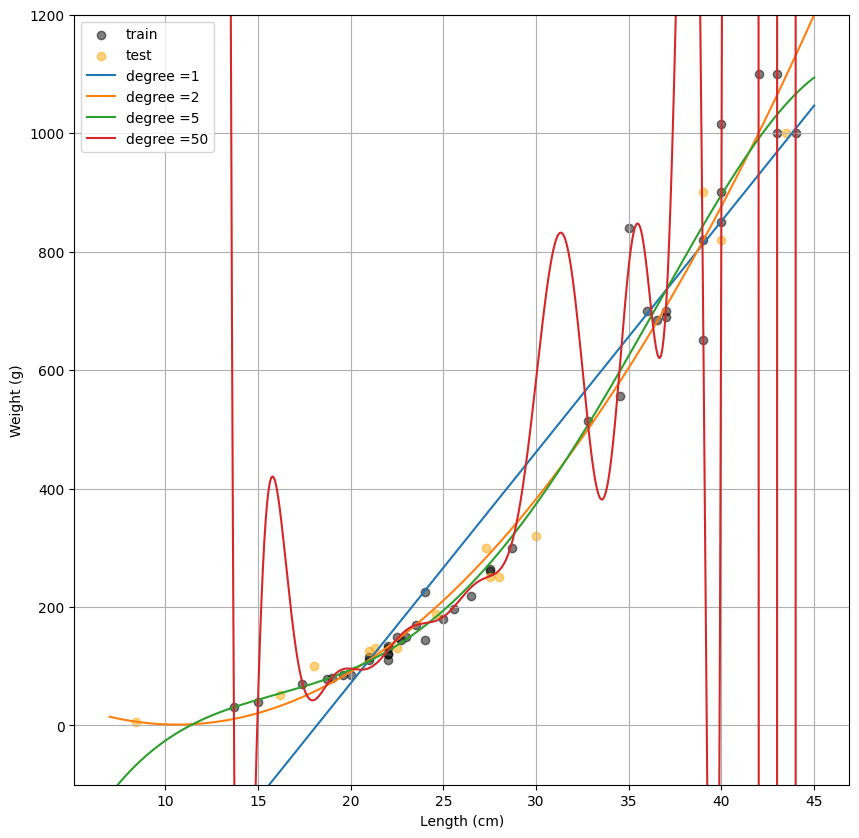

In [138]:
degrees = (1,2,5,50)
estimator = LinearRegression()
visualize_regression(X_train, y_train, X_test, y_test, degrees, estimator)

## l1 규제(Lasso)

degree = 1: 0.9398382302602472 (Train) / 0.8262705448946932(Test)
degree = 2: 0.9682046094058255 (Train) / 0.9632610688126504(Test)
degree = 5: 0.9692636157789123 (Train) / 0.9718691066691287(Test)
degree = 50: 0.9747331384703934 (Train) / 0.9827585864116039(Test)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.007e+02, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


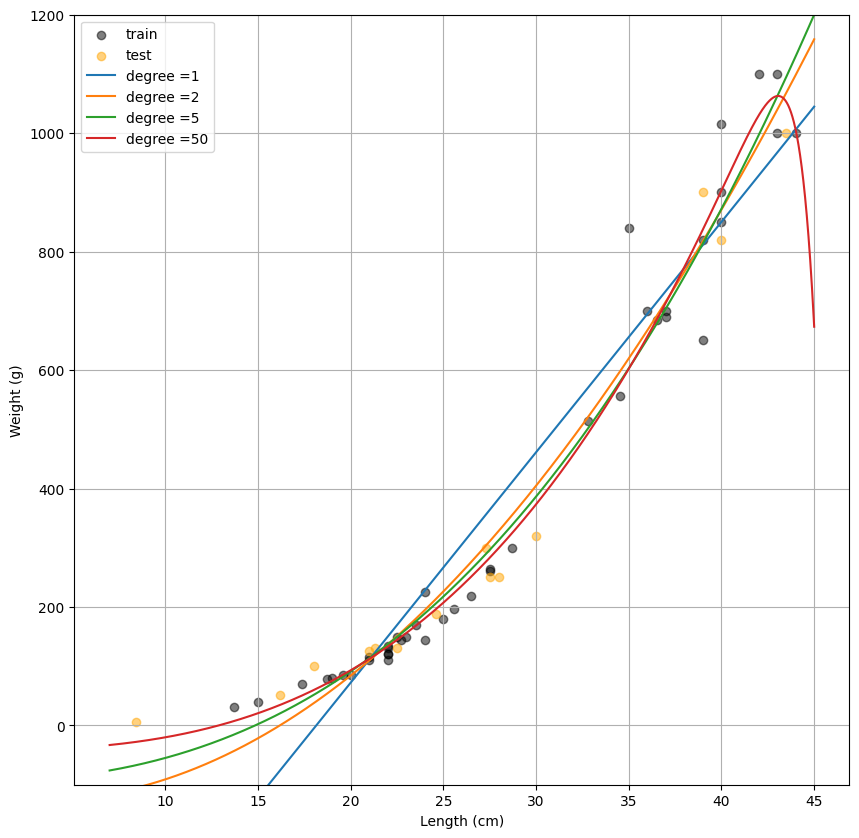

In [139]:
visualize_regression(X_train, y_train, X_test, y_test, degrees, Lasso())

## ElasticNet

degree = 1: 0.8348047834365431 (Train) / 0.8425462812915511(Test)
degree = 2: 0.9179731022680415 (Train) / 0.9211902563521128(Test)
degree = 5: 0.9574099753809557 (Train) / 0.9741613969257316(Test)
degree = 50: 0.9610659368865341 (Train) / 0.9817137006795826(Test)


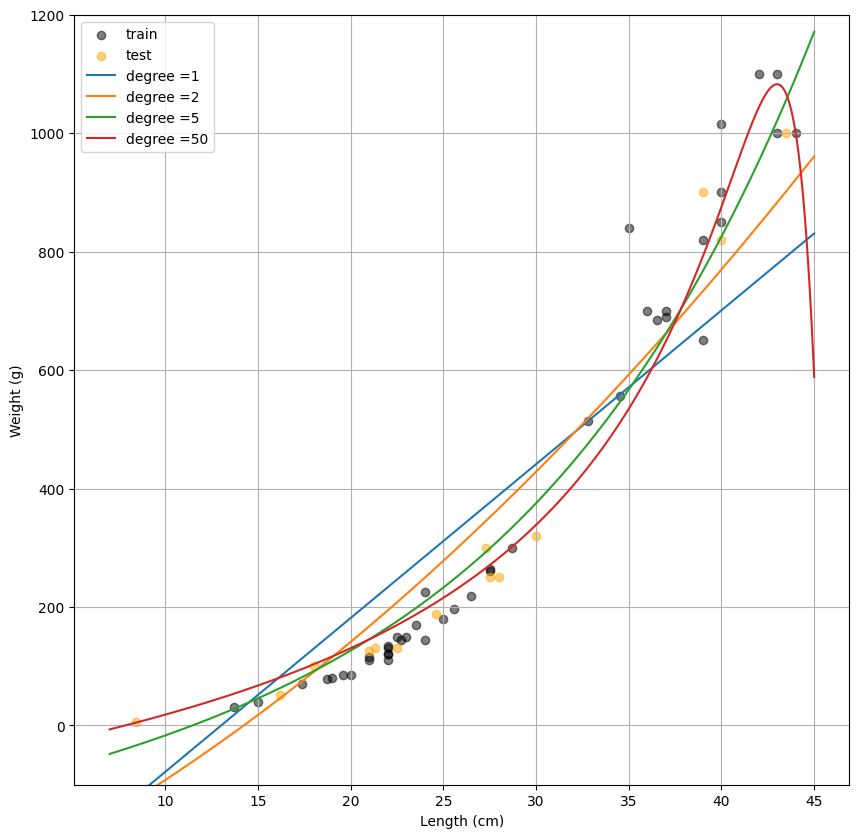

In [140]:
visualize_regression(X_train, y_train, X_test, y_test, degrees, ElasticNet())

# 하이퍼파라미터(Hyper-parameter) 튜닝

*   모델 파라미터(model parameter): 머신 러닝 알고리즘에서 만들어진 수학적인 모델의 비용함수를 최소화 하도록 만드는 파라미터들. 머신 러닝에서 스스로 찾아내는 값들
*   하이퍼파라미터(Hyper-parameter): 머신 러닝 알고리즘에서 개발자 바꿔가면서 테스트하는 파라미터들.
    *   polynomialFeatures의 degree
    *   규제(L2, L1, ElasticNet)에서 alpha
    *   KNN 알고리즘 K

# 규제 크기(alpha)에 따른 결정계수(R2 score) 변화

*   특성: Length, Diagonal, Height, Width, 레이블: Weight
*   Ridge, degree=5, StandardScaler, alpha=(0.001, 0.01, 0.1, 1.0, 10, 100), 훈련/테스트 R2
*   Lasso, degree=5, StandardScaler, alpha=(0.001, 0.01, 0.1, 1.0, 10, 100), 훈련/테스트 R2
*   ElasticNet, degree=5, StandardScaler, alpha=(0.001, 0.01, 0.1, 1.0, 10, 100), 훈련/테스트 R2

In [141]:
X = perch[perch.columns[2:]].values
y = perch['Weight'].values

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [143]:
def visualize_r2_score(X_tr, y_tr, X_te, y_te, estimator, alphas):
    train_scores = []  # 규제 크기(alpha)에 따른 훈련 셋의 결정 계수를 저장할 리스트
    test_scores = []  # 규제 크기(alpha)에 따른 테스트 셋의 결정 계수를 저장할 리스트
    for a in alphas:
        if estimator == 'l1':
            reg = Lasso(alpha=a)
        elif estimator == 'l2':
            reg = Ridge(alpha=a)
        elif estimator == 'elastic':
            reg = ElasticNet(alpha=a)
        else:
            raise ValueError('estimator는 "l1", "l2", 또는 "elastic"이어야 함.')

        pipe = Pipeline(steps=[('poly', PolynomialFeatures(degree=5, include_bias=False)),
                               ('scaler', StandardScaler()),
                               ('reg', reg)])

        pipe.fit(X_tr, y_tr)

        train_r2 = pipe.score(X_tr, y_tr)
        train_scores.append(train_r2)
        test_r2 = pipe.score(X_te, y_te)
        test_scores.append(test_r2)

        print(f'alpha={a}: train({train_r2:.3f}) / test({test_r2:.3f})')

    plt.plot(np.log10(alphas), train_scores, 'bo-', label='train $r^2$')
    plt.plot(np.log10(alphas), test_scores, 'r^:', label='test $r^2$')
    plt.legend()
    plt.grid()
    plt.xlabel('alpha (log scale)')
    plt.ylabel('$r^2$ score')
    plt.show()

In [144]:
alphas = [10 ** x for x in range(-3, 3)]
alphas

[0.001, 0.01, 0.1, 1, 10, 100]

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.223e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.931e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.286e+03, tolerance: 5.183e

alpha=0.001: train(0.991) / test(0.982)
alpha=0.01: train(0.991) / test(0.983)
alpha=0.1: train(0.990) / test(0.982)
alpha=1: train(0.990) / test(0.980)
alpha=10: train(0.989) / test(0.983)
alpha=100: train(0.908) / test(0.909)


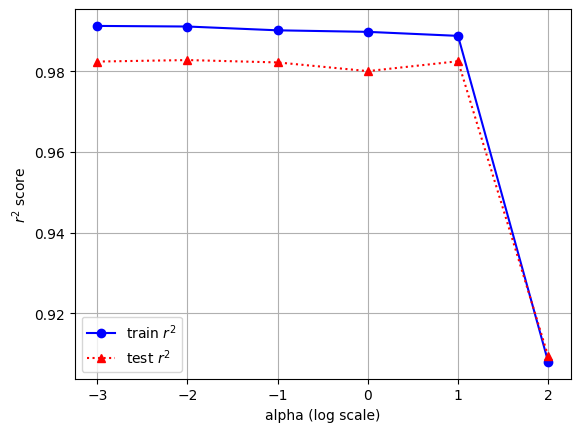

In [145]:
visualize_r2_score(X_train, y_train, X_test, y_test, 'l1', alphas)

alpha=0.001: train(0.995) / test(0.881)
alpha=0.01: train(0.993) / test(0.968)
alpha=0.1: train(0.991) / test(0.983)
alpha=1: train(0.990) / test(0.981)
alpha=10: train(0.989) / test(0.975)
alpha=100: train(0.985) / test(0.962)


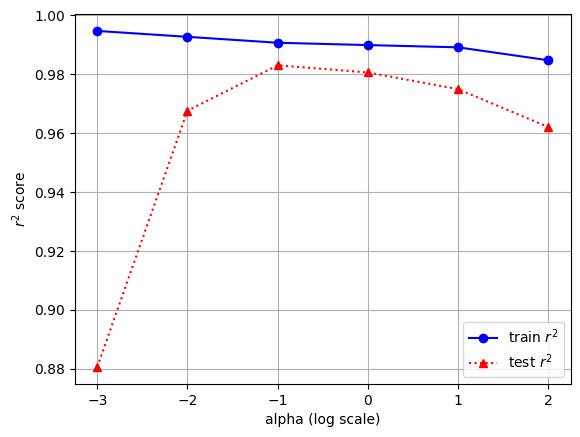

In [146]:
visualize_r2_score(X_train, y_train, X_test, y_test, 'l2', alphas)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.363e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.377e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.638e+04, tolerance: 5.183e

alpha=0.001: train(0.991) / test(0.983)
alpha=0.01: train(0.990) / test(0.983)
alpha=0.1: train(0.990) / test(0.979)
alpha=1: train(0.988) / test(0.972)
alpha=10: train(0.981) / test(0.962)
alpha=100: train(0.830) / test(0.842)


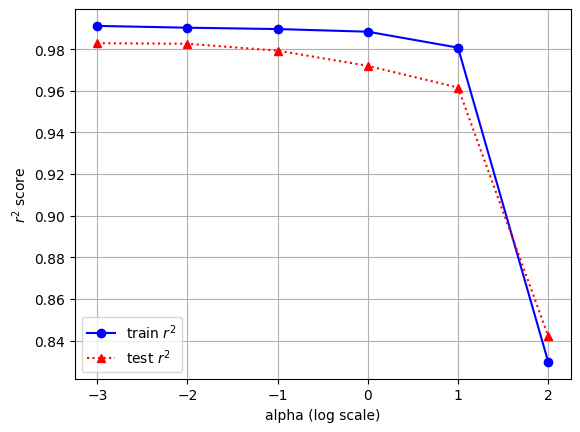

In [147]:
visualize_r2_score(X_train, y_train, X_test, y_test, 'elastic', alphas)